<a href="https://colab.research.google.com/github/lulus2781/Competition---high-fatality-accidents/blob/main/datacamp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
url = "https://raw.githubusercontent.com/lulus2781/Competition---high-fatality-accidents/main/accident-data.csv"
df <- read.csv(url)

In [2]:
head(df)

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,⋯,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
,<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<chr>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2020010219808,2020,10219808,-0.254001,51.46226,3,1,1,04/02/2020,3,⋯,6,0,9,9,1,9,9,0,0,1
2,2020010220496,2020,10220496,-0.139253,51.47033,3,1,2,27/04/2020,2,⋯,6,0,0,4,1,1,1,0,0,1
3,2020010228005,2020,10228005,-0.178719,51.52961,3,1,1,01/01/2020,4,⋯,6,0,0,0,4,1,2,0,0,1
4,2020010228006,2020,10228006,-0.001683,51.54121,2,1,1,01/01/2020,4,⋯,6,0,0,4,4,1,1,0,0,1
5,2020010228011,2020,10228011,-0.137592,51.51570,3,1,2,01/01/2020,4,⋯,5,0,0,0,4,1,1,0,0,1
6,2020010228012,2020,10228012,-0.025880,51.47628,3,1,1,01/01/2020,4,⋯,6,0,0,0,4,1,1,0,0,1


In [6]:
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.0     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter()     masks stats::filter()
x dplyr::lag()        masks stats::lag()
x tidyr::replace_na() masks metan::replace_na()



In [7]:
library(metan)

In [2]:
num_cols <- unlist(lapply(df, is.numeric))         # Identify numeric columns
num_cols

x   df1   df2   ncp   log       
FALSE FALSE FALSE FALSE FALSE FALSE

Warning message:
"Row(s) 25521, 29453, 32690, 33579, 81253, 86438, 86643, 86652, 86669, 86706, 86786, 87019, 87031, 87297 with NA values deleted."
Warning message:
"Row(s)  with NA values deleted."
Warning message:
"Removed 33 rows containing missing values (geom_text)."


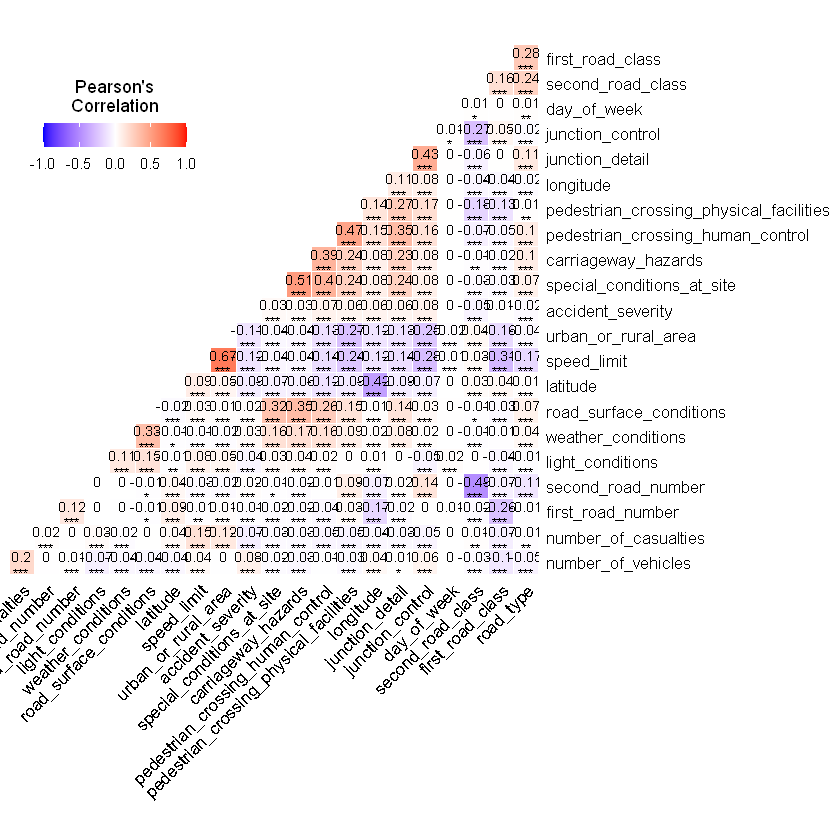

In [9]:
## library(metan)
corrl <- corr_coef(df[ , -1:-2]) ## exclude column 1 and 2
plot(corrl)